<a href="https://colab.research.google.com/github/thegreatfaizan/CIFAR-10-Image-Classification/blob/main/CIFAR_10_Image_Classification(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
#loading train and test dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

def get_all_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)
    indices_3, _ = np.where(y == 3.)
    indices_4, _ = np.where(y == 4.)
    indices_5, _ = np.where(y == 5.)
    indices_6, _ = np.where(y == 6.)
    indices_7, _ = np.where(y == 7.)
    indices_8, _ = np.where(y == 8.)
    indices_9, _ = np.where(y == 9.)

    indices = np.concatenate([indices_0, indices_1, indices_2, indices_3, indices_4, indices_5, indices_6, indices_7, indices_8, indices_9], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

x_train, y_train = get_all_classes(x_train, y_train)
x_test, y_test = get_all_classes(x_test, y_test)

print("Training Images:",x_train.shape)
print("Training Labels:",y_train.shape)
print("Testing Images:",x_test.shape)
print("Testing Labels:",y_test.shape)

Training Images: (50000, 32, 32, 3)
Training Labels: (50000, 10)
Testing Images: (10000, 32, 32, 3)
Testing Labels: (10000, 10)


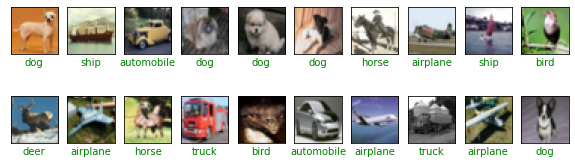

In [ ]:
classes = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#defining a function that display 10 random images from the dataset
def get_random_images(x, y, p):
  indices = np.random.choice(range(x.shape[0]), 20, replace=False)

  x=x[indices]
  y=y[indices]
  p=p[indices]
  plt.figure(figsize=(10,3))
  for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    if np.argmax(y[i]) == np.argmax(p[i]):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel(classes[np.argmax(p[i])], color=color)
  plt.show()

get_random_images(x_train, y_train, y_train)

In [ ]:
#defining CNN model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu, input_shape=(32,32,3)),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                                    
                                    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                                    tf.keras.layers.Dropout(0.2),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                                    
                                    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                                    tf.keras.layers.Dropout(0.2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)         

In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the model
model_history = model.fit(x_train, y_train,
                          epochs=100,
                          validation_data=(x_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7764 - accuracy: 0.3947 - val_loss: 1.3734 - val_accuracy: 0.5111
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3637 - accuracy: 0.5093 - val_loss: 1.2062 - val_accuracy: 0.5695
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2345 - accuracy: 0.5607 - val_loss: 1.1192 - val_accuracy: 0.5982
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1521 - accuracy: 0.5923 - val_loss: 1.0802 - val_accuracy: 0.6211
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1035 - accuracy: 0.6129 - val_loss: 1.0161 - val_accuracy: 0.6459
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0562 - accuracy: 0.6287 - val_loss: 1.0031 - val_accuracy: 0.6511
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0157 - accuracy: 0.6421 - val_loss: 0.9800 - val_ac

<function matplotlib.pyplot.show>

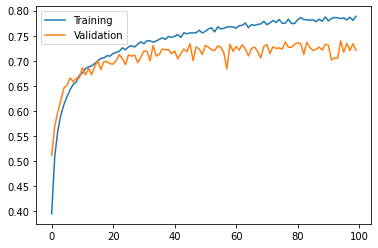

In [ ]:
#visualizing accuracy of the model
accs = model_history.history['accuracy']
val_accs = model_history.history['val_accuracy']

plt.plot(range(len(accs)), accs, label='Training')
plt.plot(range(len(val_accs)), val_accs, label='Validation')
plt.legend()
plt.show

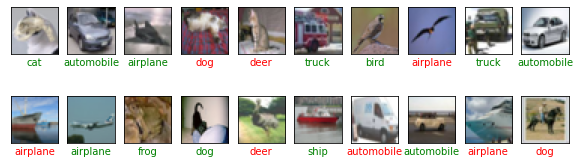

In [ ]:
#testing the model by getting random images
predictions = model.predict(x_test)
get_random_images(x_test, y_test, predictions)